dataset found here : https://www.kaggle.com/c/talkingdata-adtracking-fraud-detection/data

In [1]:
import pandas as pd 
import dask.dataframe as dd
import time

In [2]:
s_t = time.time()
# df = pd.read_csv("train.csv")  # this will far exceed the amount of free memory available
print(time.time()-s_t)

2.86102294921875e-05


In [3]:
ddf = dd.read_csv("train.csv")

In [4]:
ddf

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
npartitions=118,,,,,,,,
,int64,int64,int64,int64,int64,object,object,int64
,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...


In [5]:
ddf.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,83230,3,1,13,379,2017-11-06 14:32:21,NaN,0
1,17357,3,1,19,379,2017-11-06 14:33:34,NaN,0
2,35810,3,1,13,379,2017-11-06 14:34:12,NaN,0
3,45745,14,1,13,478,2017-11-06 14:34:52,NaN,0
4,161007,3,1,13,379,2017-11-06 14:35:08,NaN,0


In [6]:
ddf[ddf['app'] == 3]

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
npartitions=118,,,,,,,,
,int64,int64,int64,int64,int64,object,object,int64
,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...


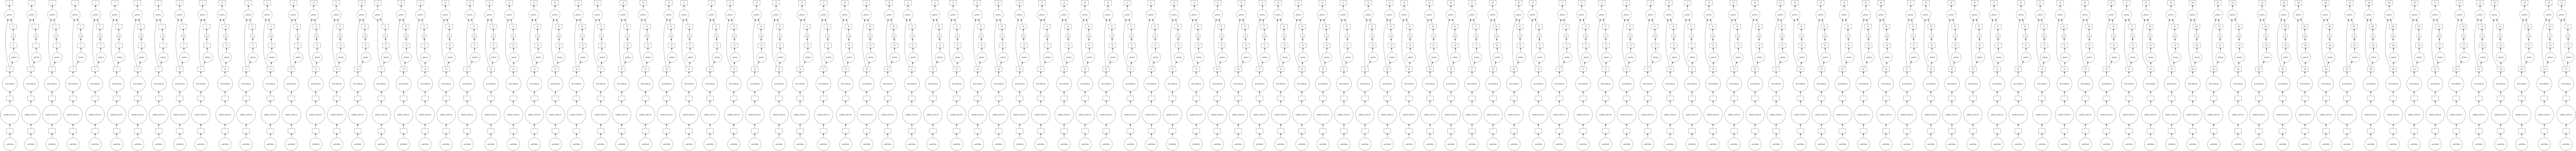

In [7]:
ddf[ddf['app'] == 3].visualize()

In [8]:
ddf[ddf['app'] == 3]['attributed_time'].dropna().compute()

/home/william/.local/share/virtualenvs/dask-y6GVKmAp/lib/python3.6/site-packages/dask/core.py:118: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  args2 = [_execute_task(a, cache) for a in args]


25909     2017-11-06 16:01:28
32791     2017-11-06 16:01:20
59120     2017-11-07 09:59:28
63593     2017-11-06 16:25:09
136507    2017-11-06 16:03:12
                 ...         
353226    2017-11-09 15:47:14
566921    2017-11-09 15:51:42
568932    2017-11-09 15:52:17
588155    2017-11-09 15:46:08
658831    2017-11-09 15:54:18
Name: attributed_time, Length: 10261, dtype: object